### Heart Disease Prediction Model Building

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reading data
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# top 5 rows of data
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Data Cleaning

In [5]:
# removing records with thall = 0
heart_data = heart_data[heart_data['thall'] != 0]

In [6]:
# reseting index after removing records
heart_data.reset_index(drop = True, inplace = True)

In [7]:
# creating lists
numerical_cols = ['age','trtbps','chol','thalachh','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
target = ['output']

In [8]:
# summary of numerical columns before outlier handling
numericalcols_summary = heart_data[numerical_cols].describe().transpose().reset_index(drop = False)
numericalcols_summary.rename(columns = {'index':'colname'},inplace = True)
numericalcols_summary

,colname,count,mean,std,min,25%,50%,75%,max
0,age,301.0,54.378738,9.110950,29.0,47.0,56.0,61.0,77.0
1,trtbps,301.0,131.647841,17.594002,94.0,120.0,130.0,140.0,200.0
2,chol,301.0,246.504983,51.915998,126.0,211.0,241.0,275.0,564.0
3,thalachh,301.0,149.740864,22.891031,71.0,134.0,153.0,166.0,202.0
4,oldpeak,301.0,1.043189,1.163384,0.0,0.0,0.8,1.6,6.2


<Axes: >

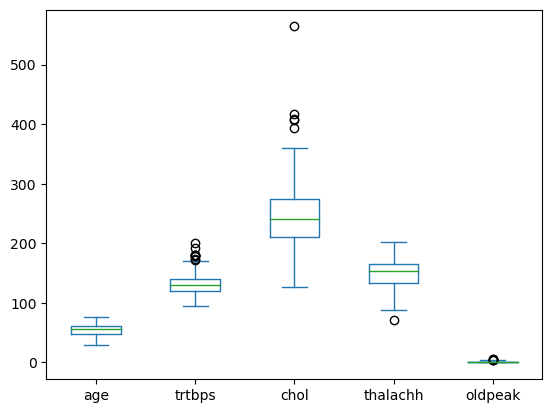

In [9]:
# box plot before outlier handling
heart_data[numerical_cols].plot(kind = 'box')

In [10]:
# outlier handling
for i in numerical_cols:
    q3 = list(numericalcols_summary[numericalcols_summary['colname'] == i]['75%'])[0]
    q1 = list(numericalcols_summary[numericalcols_summary['colname'] == i]['25%'])[0]
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    mask1 = heart_data[i]<lb
    mask2 = heart_data[i]>ub
    heart_data.loc[mask1,i] = lb
    heart_data.loc[mask2,i] = ub

In [11]:
# summary of numerical columns before outlier handling
numericalcols_summary_1 = heart_data[numerical_cols].describe().transpose().reset_index(drop = False)
numericalcols_summary_1.rename(columns = {'index':'colname'},inplace = True)
numericalcols_summary_1

,colname,count,mean,std,min,25%,50%,75%,max
0,age,301.0,54.378738,9.110950,29.0,47.0,56.0,61.0,77.0
1,trtbps,301.0,131.302326,16.635253,94.0,120.0,130.0,140.0,170.0
2,chol,301.0,245.388704,47.676393,126.0,211.0,241.0,275.0,371.0
3,thalachh,301.0,149.790698,22.734835,86.0,134.0,153.0,166.0,202.0
4,oldpeak,301.0,1.027907,1.112243,0.0,0.0,0.8,1.6,4.0


<Axes: >

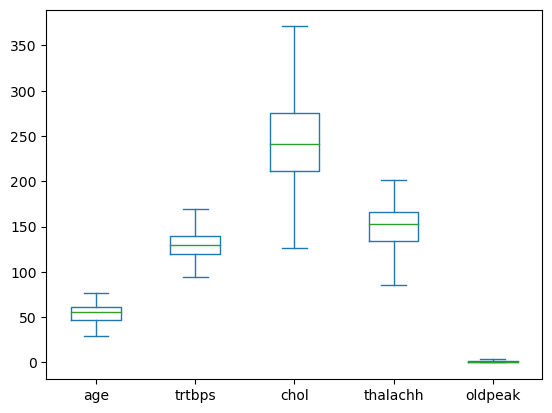

In [12]:
# box plot after outlier handling
heart_data[numerical_cols].plot(kind = 'box')

#### Creation of diet column using K means clustering method

In [13]:
heart_data['diet'] = 0

In [14]:
# 0 - low fat diet, 1 - high fat diet
mask1 = ((heart_data['chol'] >= 170) & (heart_data['age'] < 20)) | ((heart_data['chol'] >= 200) & (heart_data['age'] > 20))
mask2 = ((heart_data['chol'] < 170) & (heart_data['age'] <= 20)) | ((heart_data['chol'] < 200) & (heart_data['age'] >= 20))
heart_data.loc[mask1,'diet'] = 1
heart_data.loc[mask2,'diet'] = 0

In [15]:
heart_data['diet'] = heart_data['diet'].astype('int')

In [16]:
heart_data_eda = heart_data.copy()

In [17]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heart_data[numerical_cols] = scaler.fit_transform(heart_data[numerical_cols])

In [18]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,diet
0,0.947829,1,3,0.824784,-0.260283,1,0,0.009222,0,1.145623,0,0,1,1,1
1,-1.910633,1,2,-0.078417,0.096882,0,1,1.639390,0,2.226320,0,0,2,1,1
2,-1.470869,0,1,-0.078417,-0.869563,0,0,0.978511,0,0.335100,2,0,2,1,1
3,0.178243,1,1,-0.680552,-0.197254,0,1,1.242863,0,-0.205249,2,0,2,1,1
4,0.288184,0,0,-0.680552,2.281887,0,1,0.581984,1,-0.385365,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.288184,0,0,0.523717,-0.092205,0,1,-1.180361,1,-0.745597,1,0,3,0,1
297,-1.031106,1,3,-1.282686,0.391017,0,1,-0.783833,0,0.154984,1,0,3,0,1
298,1.497533,1,0,0.764570,-1.100669,1,1,-0.387306,0,2.136262,1,2,3,0,0
299,0.288184,1,0,-0.078417,-2.403269,0,1,-1.532830,1,0.154984,1,1,3,0,0


#### Creation of physical activity column using K means clustering method

In [19]:
from sklearn.cluster import KMeans

In [20]:
heart_data_PA = heart_data[['age','trtbps','chol','fbs','thalachh']]

In [21]:
kmeans = KMeans(2)
kmeans.fit(heart_data_PA)

KMeans(n_clusters=2)

In [22]:
identified_clusters = kmeans.fit_predict(heart_data_PA)

In [23]:
heart_data['physical activity'] = identified_clusters

#### Creation of smoke column using K means clustering method

In [24]:
heart_data_SM = heart_data[['chol','fbs','thalachh']]

In [25]:
kmeans = KMeans(2)
kmeans.fit(heart_data_SM)

KMeans(n_clusters=2)

In [26]:
identified_clusters = kmeans.fit_predict(heart_data_SM)

In [27]:
heart_data['smoke'] = identified_clusters

In [28]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,diet,physical activity,smoke
0,0.947829,1,3,0.824784,-0.260283,1,0,0.009222,0,1.145623,0,0,1,1,1,1,1
1,-1.910633,1,2,-0.078417,0.096882,0,1,1.639390,0,2.226320,0,0,2,1,1,0,1
2,-1.470869,0,1,-0.078417,-0.869563,0,0,0.978511,0,0.335100,2,0,2,1,1,0,1
3,0.178243,1,1,-0.680552,-0.197254,0,1,1.242863,0,-0.205249,2,0,2,1,1,0,1
4,0.288184,0,0,-0.680552,2.281887,0,1,0.581984,1,-0.385365,2,0,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.288184,0,0,0.523717,-0.092205,0,1,-1.180361,1,-0.745597,1,0,3,0,1,1,0
297,-1.031106,1,3,-1.282686,0.391017,0,1,-0.783833,0,0.154984,1,0,3,0,1,0,0
298,1.497533,1,0,0.764570,-1.100669,1,1,-0.387306,0,2.136262,1,2,3,0,0,1,1
299,0.288184,1,0,-0.078417,-2.403269,0,1,-1.532830,1,0.154984,1,1,3,0,0,1,1


### Exploratory Data Analysis

In [29]:
heart_data_eda['physical activity'] = heart_data['physical activity']
heart_data_eda['smoke'] = heart_data['smoke']

In [30]:
mask1 = (heart_data_eda['sex'] == 1)
mask2 = (heart_data_eda['sex'] == 0)
heart_data_eda.loc[mask1,'sex'] = 'male'
heart_data_eda.loc[mask2,'sex'] = 'female'
mask1 = (heart_data_eda['cp'] == 0)
mask2 = (heart_data_eda['cp'] == 1)
mask3 = (heart_data_eda['cp'] == 2)
mask4 = (heart_data_eda['cp'] == 3)
heart_data_eda.loc[mask1,'cp'] = 'asymptomatic'
heart_data_eda.loc[mask2,'cp'] = 'atypical angina'
heart_data_eda.loc[mask3,'cp'] = 'non-anginal pain'
heart_data_eda.loc[mask4,'cp'] = 'typical angina'
mask1 = (heart_data_eda['fbs'] == 1)
mask2 = (heart_data_eda['fbs'] == 0)
heart_data_eda.loc[mask1,'fbs'] = '> 120 mg/dl'
heart_data_eda.loc[mask2,'fbs'] = '< 120 mg/dl'
mask1 = (heart_data_eda['restecg'] == 0)
mask2 = (heart_data_eda['restecg'] == 1)
mask3 = (heart_data_eda['restecg'] == 2)
heart_data_eda.loc[mask1,'restecg'] = 'left ventricular hypertrophy'
heart_data_eda.loc[mask2,'restecg'] = 'normal'
heart_data_eda.loc[mask3,'restecg'] = 'ST-T wave abnormality'
mask1 = (heart_data_eda['exng'] == 1)
mask2 = (heart_data_eda['exng'] == 0)
heart_data_eda.loc[mask1,'exng'] = 'exercise induced angina'
heart_data_eda.loc[mask2,'exng'] = 'no exercise induced angina'
mask1 = (heart_data_eda['slp'] == 0)
mask2 = (heart_data_eda['slp'] == 1)
mask3 = (heart_data_eda['slp'] == 2)
heart_data_eda.loc[mask1,'slp'] = 'downsloping'
heart_data_eda.loc[mask2,'slp'] = 'flat'
heart_data_eda.loc[mask3,'slp'] = 'upsloping'
mask1 = (heart_data_eda['thall'] == 1)
mask2 = (heart_data_eda['thall'] == 2)
mask3 = (heart_data_eda['thall'] == 3)
heart_data_eda.loc[mask1,'thall'] = 'fixed defect'
heart_data_eda.loc[mask2,'thall'] = 'normal blood flow'
heart_data_eda.loc[mask3,'thall'] = 'reversible defect'
mask1 = (heart_data_eda['output'] == 1)
mask2 = (heart_data_eda['output'] == 0)
heart_data_eda.loc[mask1,'output'] = 'no heart disease'
heart_data_eda.loc[mask2,'output'] = 'heart disease'
mask1 = (heart_data_eda['physical activity'] == 1)
mask2 = (heart_data_eda['physical activity'] == 0)
heart_data_eda.loc[mask1,'physical activity'] = 'no physical activity'
heart_data_eda.loc[mask2,'physical activity'] = 'physical activity'
mask1 = (heart_data_eda['diet'] == 1)
mask2 = (heart_data_eda['diet'] == 0)
heart_data_eda.loc[mask1,'diet'] = 'high fat diet'
heart_data_eda.loc[mask2,'diet'] = 'low fat diet'
mask1 = (heart_data_eda['smoke'] == 1)
mask2 = (heart_data_eda['smoke'] == 0)
heart_data_eda.loc[mask1,'smoke'] = 'smokes'
heart_data_eda.loc[mask2,'smoke'] = 'doesnt smoke'

In [31]:
heart_data_eda
heart_data_eda.to_csv('heart_data.csv', index=False)

In [32]:
new_categorical_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall','physical activity','diet','smoke','output']

In [33]:
sns.set_style('darkgrid')

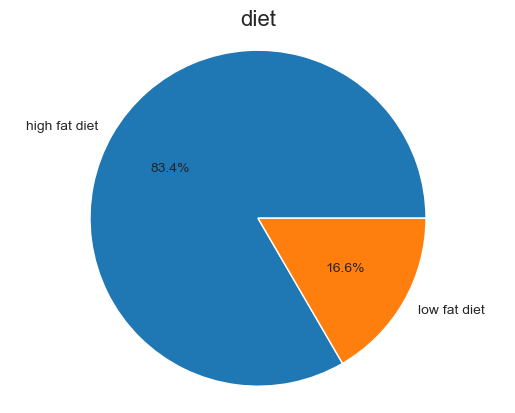

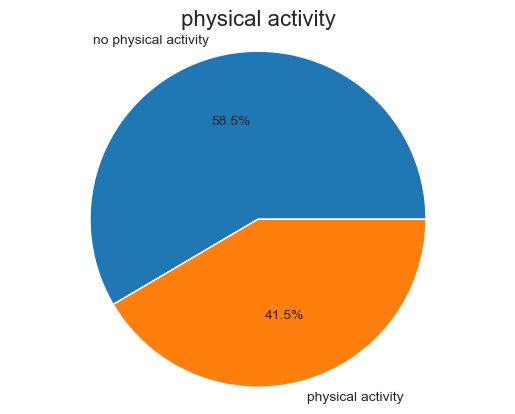

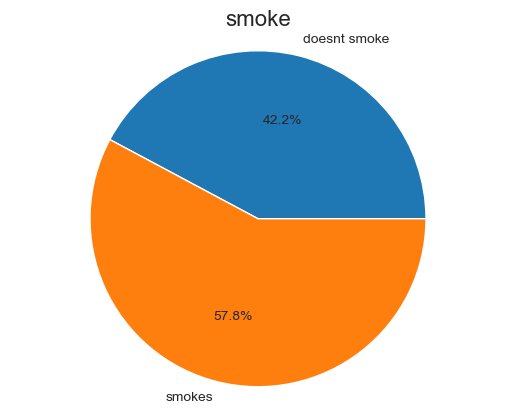

In [34]:
for i in ['diet','physical activity','smoke']:
    labels = heart_data_eda[i].astype('category').cat.categories.tolist()
    counts = heart_data_eda[i].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    plt.title(i,fontsize = 16)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%') #autopct is show the % on plot
    ax1.axis('equal')
    plt.show()

Around 83.4% of the population consumes a diet heavy in fat. In addition, the majority of
people (58.5%) do not exercise regularly. Non-smokers make up to the majority of the
population (57.2%).

Text(0.5, 1.0, 'Gender vs Output\n')

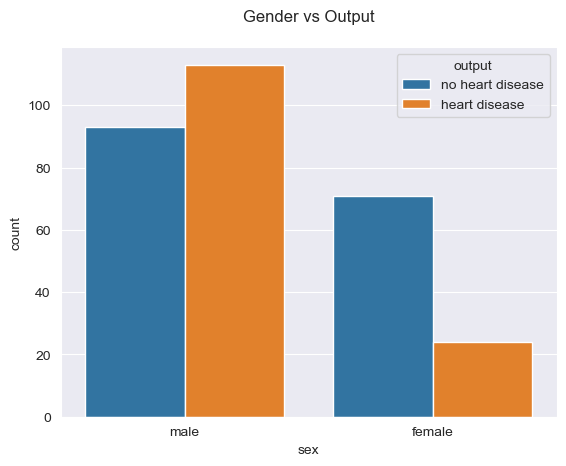

In [35]:
sns.countplot(data= heart_data_eda, x='sex',hue='output')
plt.title('Gender vs Output\n')

From the graph it is visible that Female has low chance of heart attack compared
to male.

Text(0.5, 1.0, 'Gender vs Thalassemia\n')

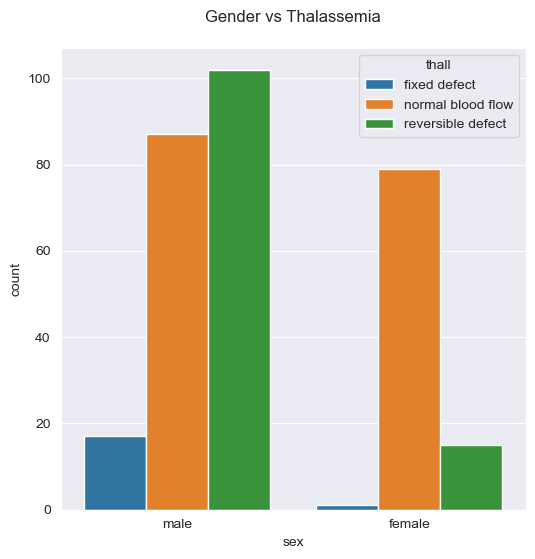

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(data= heart_data_eda, x='sex',hue='thall')
plt.title('Gender vs Thalassemia\n')

A reversible defect(abnormality) that increases the
risk of heart disease exists in the majority of men. There is a modest risk of heart
disease in women because the majority of them have normal blood pressure.

Text(0.5, 1.0, 'Gender vs Fasting Blood Sugar\n')

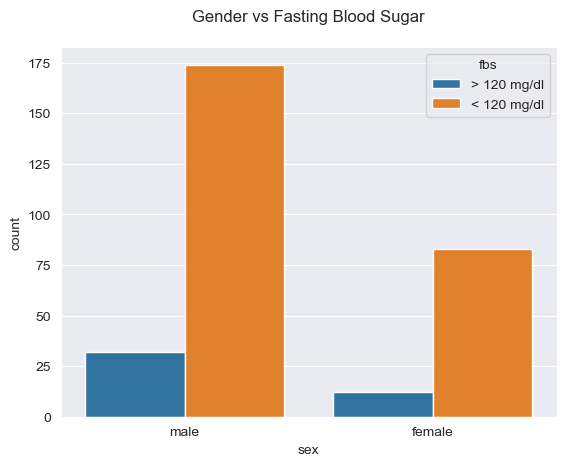

In [37]:
sns.countplot(data= heart_data_eda, x='sex',hue='fbs')
plt.title('Gender vs Fasting Blood Sugar\n')

Text(0.5, 1.0, 'Gender vs Physical Activity\n')

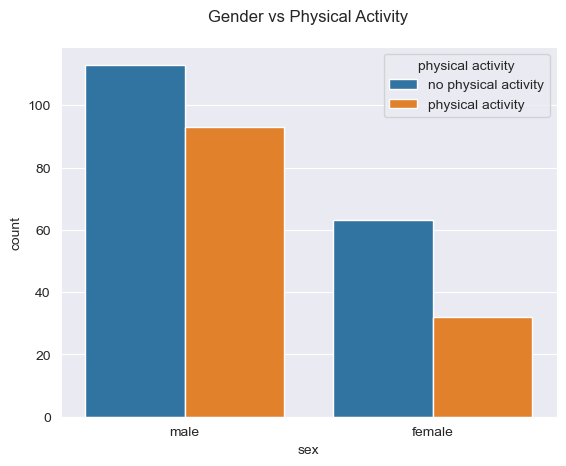

In [38]:
sns.countplot(data= heart_data_eda, x='sex',hue='physical activity')
plt.title('Gender vs Physical Activity\n')

From the genders, there are more number of people who do not exercise 

Text(0.5, 1.0, 'Gender vs Diet\n')

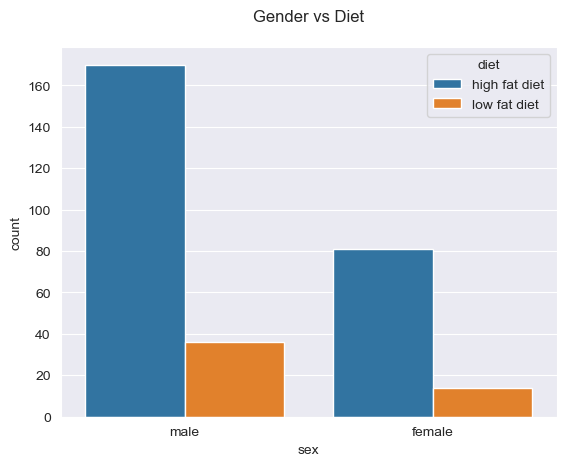

In [39]:
sns.countplot(data= heart_data_eda, x='sex',hue='diet')
plt.title('Gender vs Diet\n')

Text(0.5, 1.0, 'Gender vs Smoke\n')

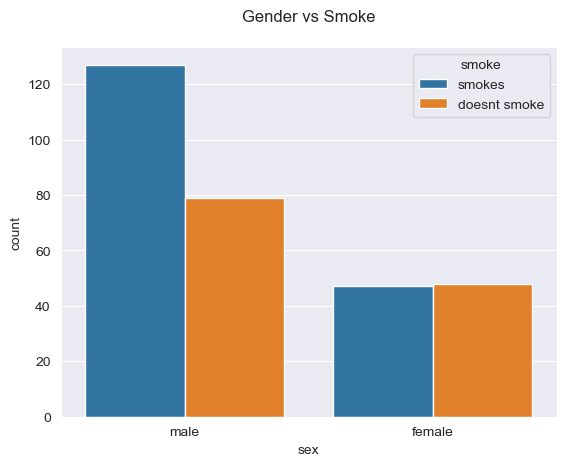

In [40]:
sns.countplot(data= heart_data_eda, x='sex',hue='smoke')
plt.title('Gender vs Smoke\n')

Text(0.5, 1.0, 'Chest Pain Type vs output\n')

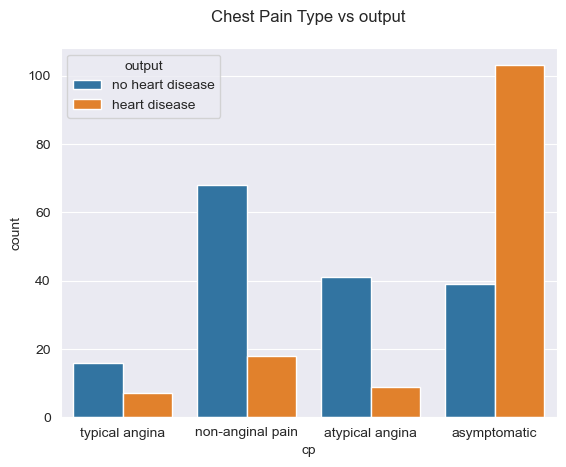

In [41]:
sns.countplot(data= heart_data_eda, x='cp',hue='output')
plt.title('Chest Pain Type vs output\n')

This is the most contributing factor among all the other aspects because people
who experience asymptomatic chest pain are more likely to suffer a heart attack
than people who experience other types of chest pain

Text(0.5, 1.0, 'Thalassemia vs Output\n')

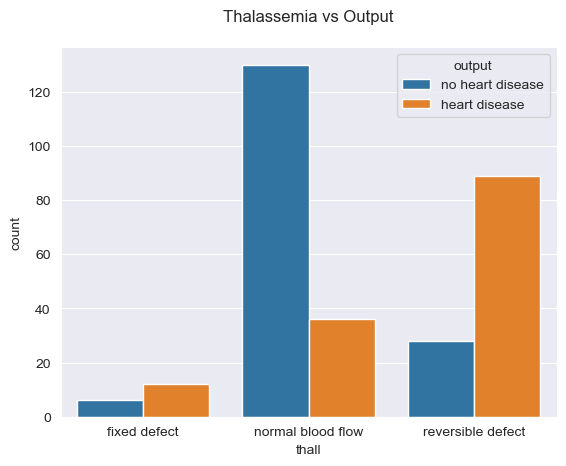

In [42]:
sns.countplot(data= heart_data_eda, x='thall',hue='output')
plt.title('Thalassemia vs Output\n')

Thalassemia is a kind of blood disorder due to insufficient hemoglobin.
People who have reversible blood flow and fixed defect are more prone to more
heart attack

Text(0.5, 1.0, 'Fasting Blood Sugar vs Output\n')

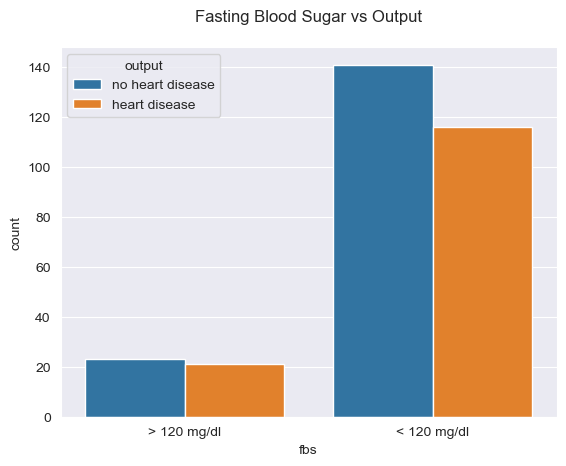

In [43]:
sns.countplot(data= heart_data_eda, x='fbs',hue='output')
plt.title('Fasting Blood Sugar vs Output\n')

Heart health is not significantly impacted
by fasting blood sugar levels. But over time, diabetes has a greater possibility of
affecting heart health because it thickens blood, which has an impact on blood flow.

Text(0.5, 1.0, 'Restecg vs Output\n')

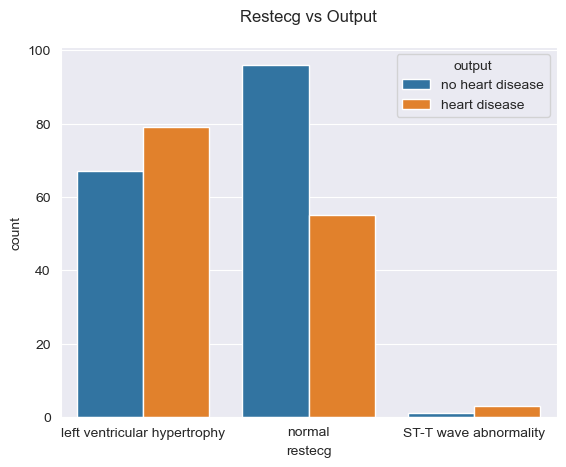

In [44]:
sns.countplot(data= heart_data_eda, x='restecg',hue='output')
plt.title('Restecg vs Output\n')

People who have left ventricular hypertrophy are more prone to heart attack.

Text(0.5, 1.0, 'Exercise Induced Angina vs Output\n')

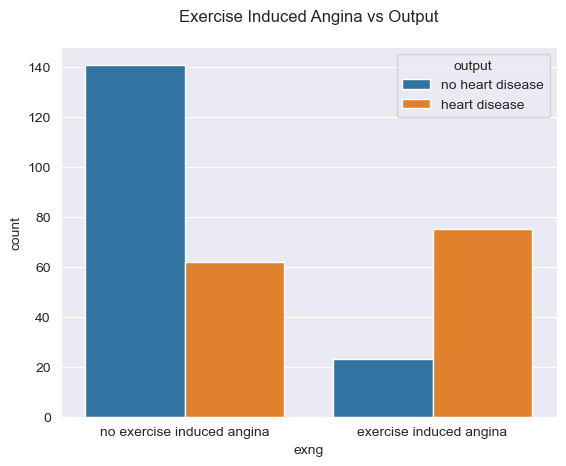

In [45]:
sns.countplot(data= heart_data_eda, x='exng',hue='output')
plt.title('Exercise Induced Angina vs Output\n')

People who experience discomfort while exercising are more likely to suffer a
heart attack. People who engage in strenuous exercise, such as jogging or working
out, frequently exhibit this.

Text(0.5, 1.0, 'Number of major vessels vs Output\n')

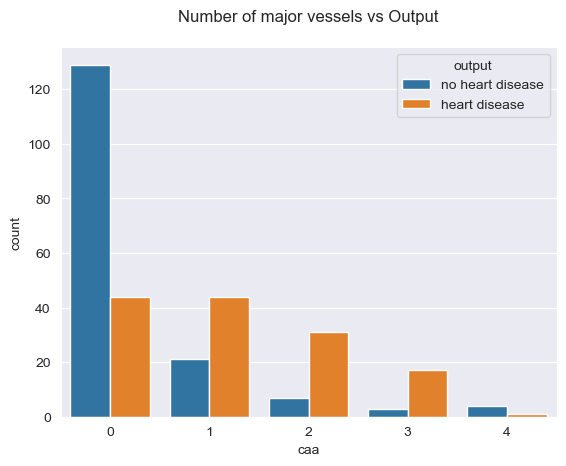

In [46]:
sns.countplot(data= heart_data_eda, x='caa',hue='output')
plt.title('Number of major vessels vs Output\n')

Text(0.5, 1.0, 'Slope vs Output\n')

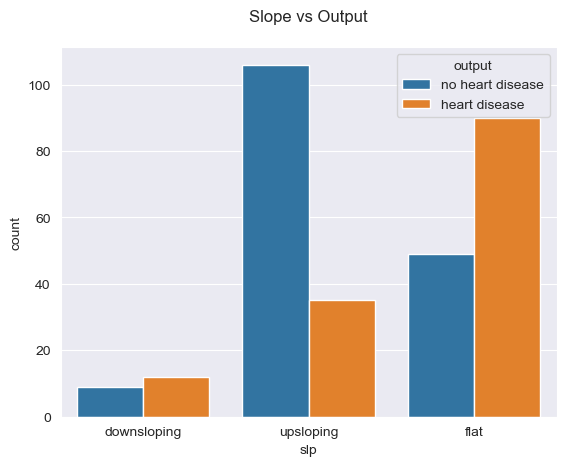

In [47]:
sns.countplot(data= heart_data_eda, x='slp',hue='output')
plt.title('Slope vs Output\n')

Slope is defined as the slope of a line formed from a graph of the
electrocardiogram (ECG) that contains both peaks and depressions. The heart does
not beat frequently if the slope is flat.
People with flat types of slopes are more susceptible to heart attacks since their
hearts don’t contract and expand as much.

Text(0.5, 1.0, 'Diet vs Output\n')

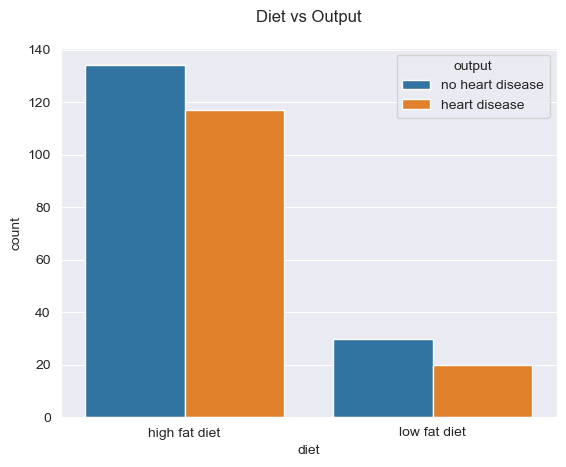

In [48]:
sns.countplot(data= heart_data_eda, x='diet',hue='output')
plt.title('Diet vs Output\n')

The graph demonstrates that nutrition has little effect on output, making it a minor
contributing factor.

Text(0.5, 1.0, 'Physical Activity vs Output\n')

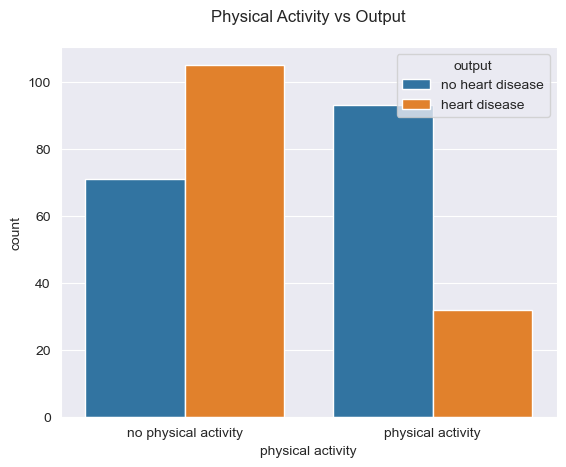

In [49]:
sns.countplot(data= heart_data_eda, x='physical activity',hue='output')
plt.title('Physical Activity vs Output\n')

People who don’t exercise regularly are more likely to experience a heart attack
than those who do.

Text(0.5, 1.0, 'Smoke vs Output\n')

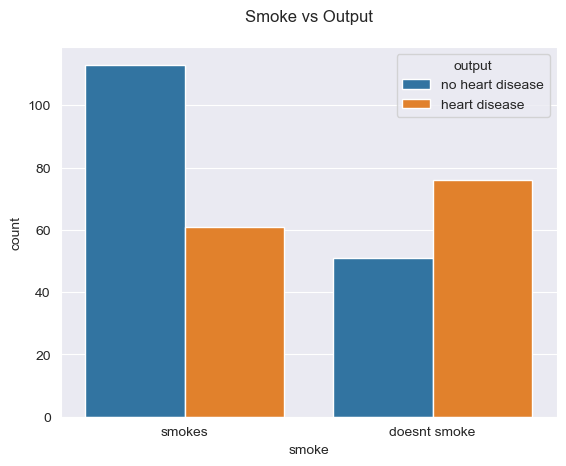

In [50]:
sns.countplot(data= heart_data_eda, x='smoke',hue='output')
plt.title('Smoke vs Output\n')

People who smoke are more prone to heart disease compared to the people who
doesn’t smoke.

In [51]:
heart_data_eda['lifestyle'] = heart_data_eda['diet'] + '_' + heart_data_eda['physical activity'] + '_' + heart_data_eda['smoke']

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high fat diet_no physical activity_smokes'),
  Text(1, 0, 'high fat diet_physical activity_smokes'),
  Text(2, 0, 'high fat diet_no physical activity_doesnt smoke'),
  Text(3, 0, 'low fat diet_no physical activity_smokes'),
  Text(4, 0, 'low fat diet_physical activity_smokes'),
  Text(5, 0, 'high fat diet_physical activity_doesnt smoke')])

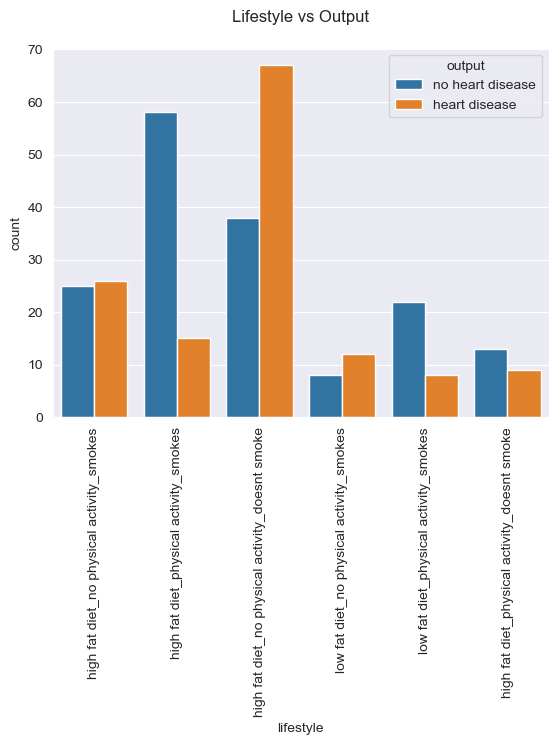

In [52]:
sns.countplot(data= heart_data_eda, x='lifestyle',hue='output')
plt.title('Lifestyle vs Output\n')
plt.xticks(rotation=90)

In comparison to People who consume a high-fat diet or a low-fat diet, engage in
physical activity, refrain from smoking, heart attacks are more likely to happen in
people who smoke, do no exercise, and consume a high-fat diet.

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

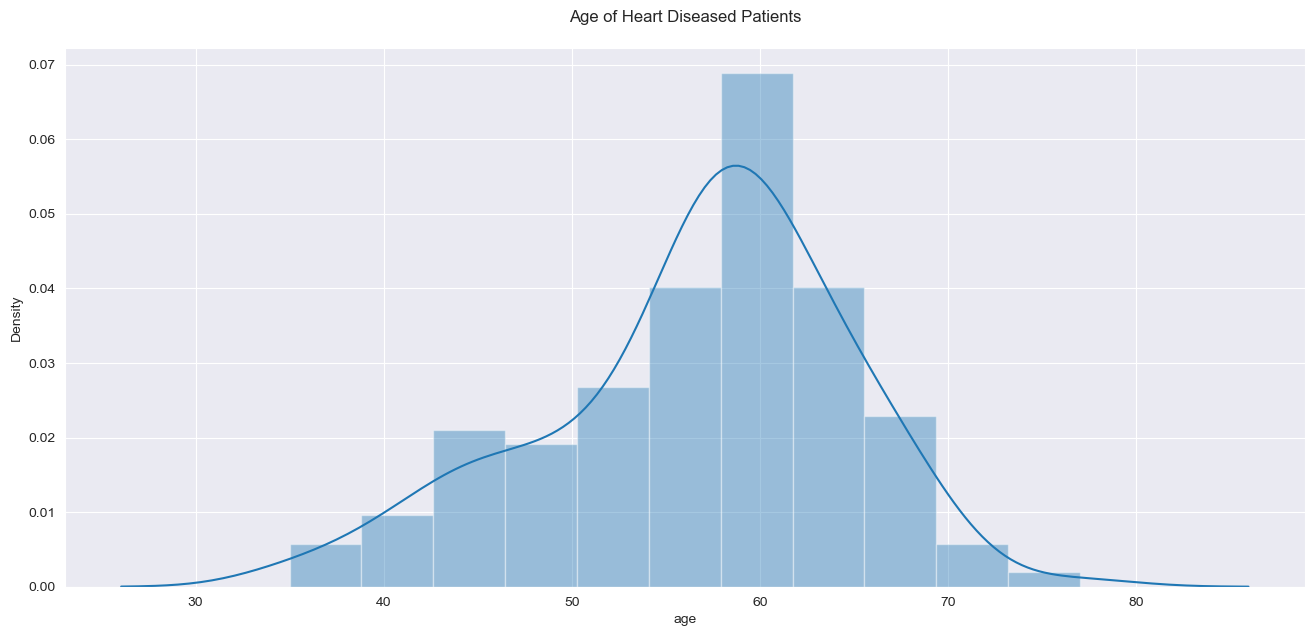

In [53]:
plt.figure(figsize=(16,7))
sns.distplot(heart_data_eda[heart_data_eda['output']=='heart disease']['age'],kde=True)
plt.title('Age of Heart Diseased Patients\n')

Heart Disease is very common in the seniors, which is composed of age group centred
at 60 and above and common among adults which belong to the age group of 40 to 60
(range) and is clustered between 55 to 65 age group. But it’s rare among the age group
of 19 to 40 and very rare among the age group of 0 to 18.

Text(0.5, 1.0, 'Cholestrol of Heart Diseased Patients\n')

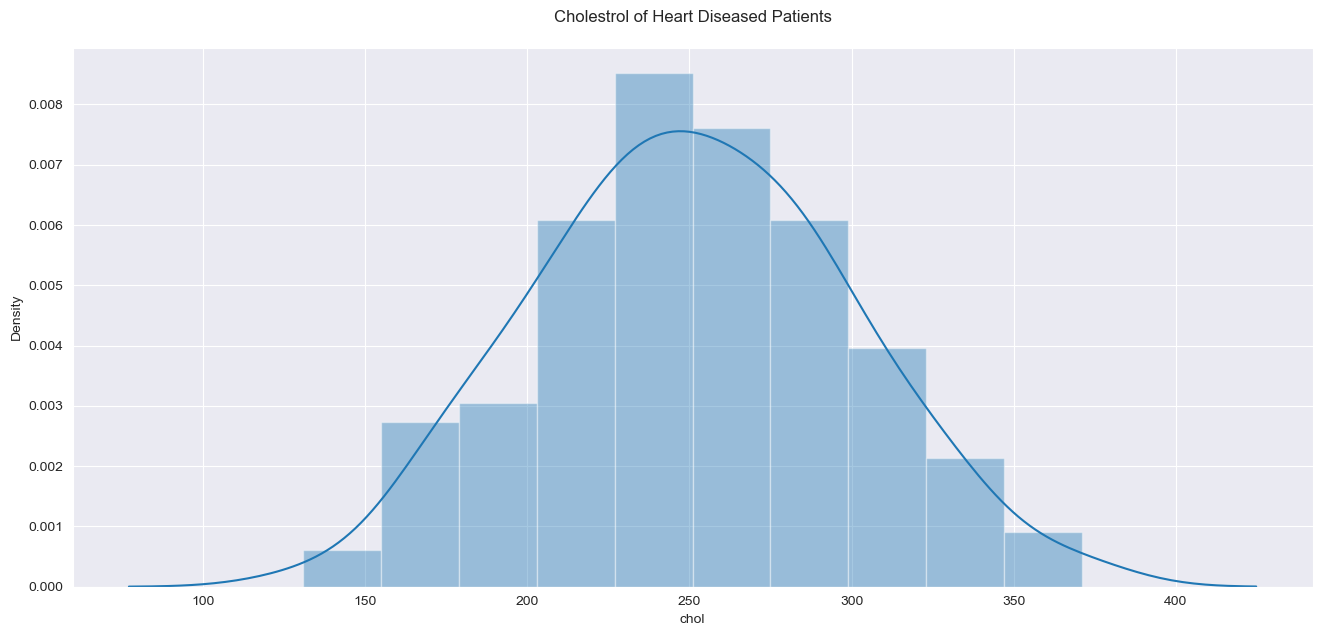

In [54]:
plt.figure(figsize=(16,7))
sns.distplot(heart_data_eda[heart_data_eda['output']=='heart disease']['chol'],kde=True)
plt.title('Cholestrol of Heart Diseased Patients\n')

The Cholesterol level varies from 150 to 350, centered around 250, and is clustered
between 200 to 300.

Text(0.5, 1.0, 'Resting Blood Pressure of Heart Diseased Patients\n')

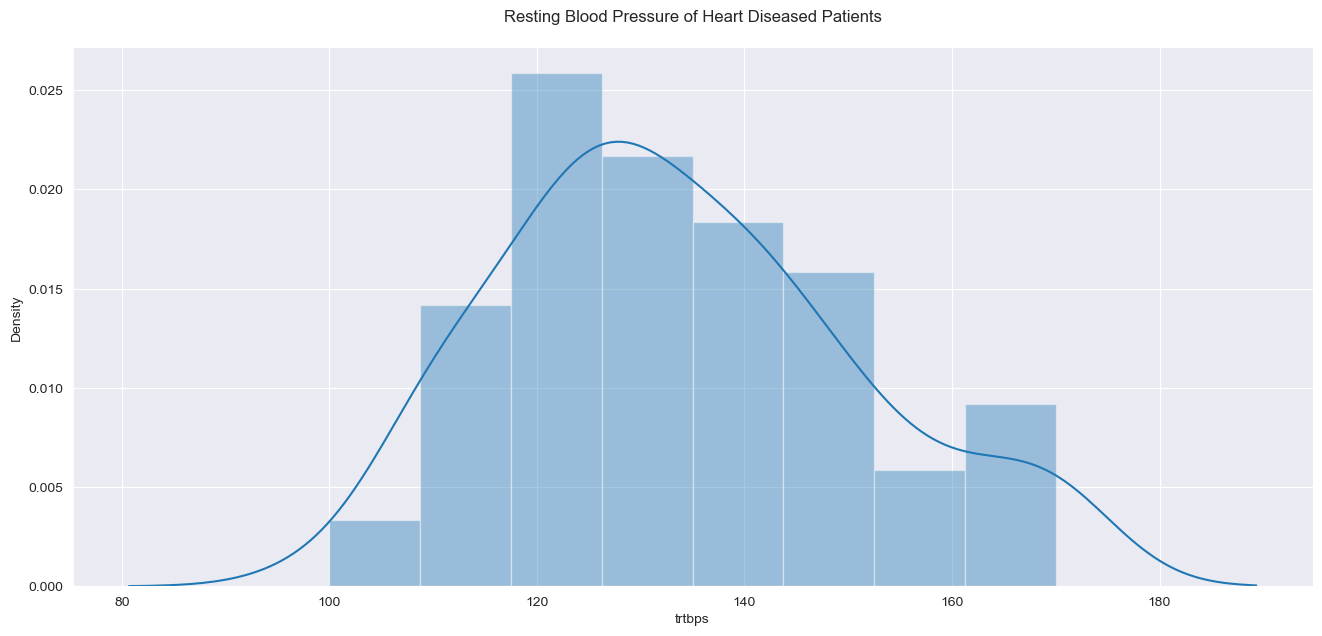

In [55]:
plt.figure(figsize=(16,7))
sns.distplot(heart_data_eda[heart_data_eda['output']=='heart disease']['trtbps'],kde=True)
plt.title('Resting Blood Pressure of Heart Diseased Patients\n')

The graph of the Resting Blood pressure distribution of heart disease patients depicts
the Resting Blood pressure level values ranging from 110 to 170, where mean is
around 130, and is clustered between 120 to 140.

Text(0.5, 1.0, 'Maximum Heart Rate of Heart Diseased Patients\n')

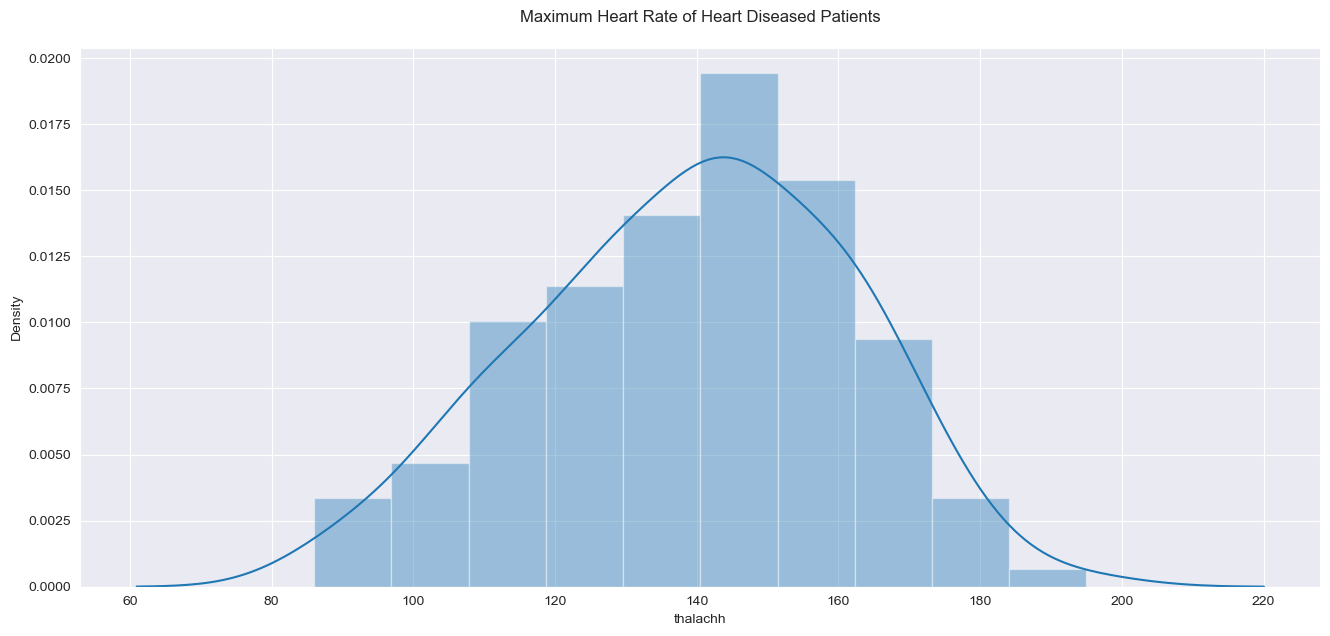

In [56]:
plt.figure(figsize=(16,7))
sns.distplot(heart_data_eda[heart_data_eda['output']=='heart disease']['thalachh'],kde=True)
plt.title('Maximum Heart Rate of Heart Diseased Patients\n')

The graph of the Maximum Heart Rate distribution of heart disease patients shows the
Maximum Heart Rate levels ranging from 100 to 180, the mean is around 145, and is
clustered between 120 to 170.

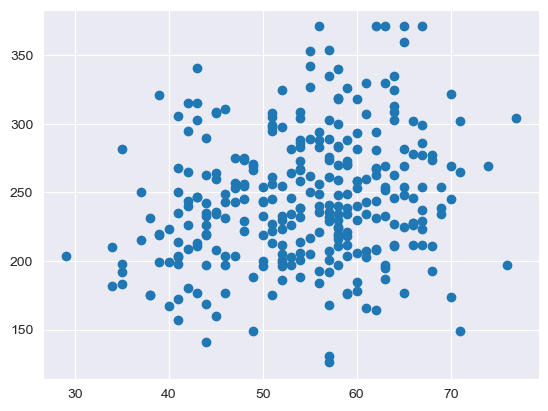

In [57]:
plt.scatter(heart_data_eda['age'],heart_data_eda['chol'])
plt.show()

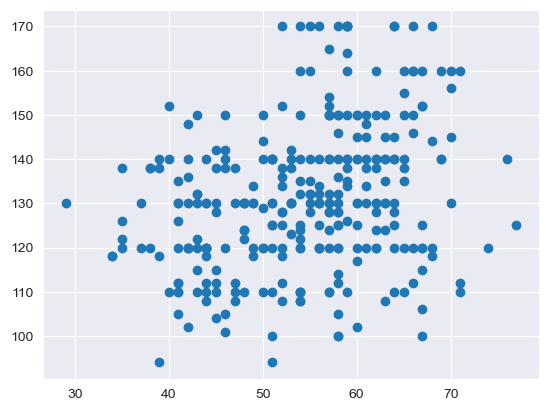

In [58]:
plt.scatter(heart_data_eda['age'],heart_data_eda['trtbps'])
plt.show()

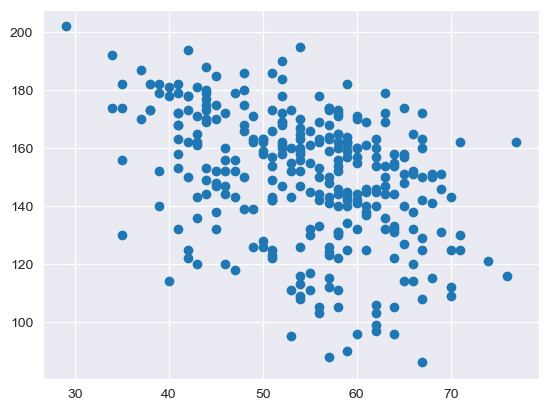

In [59]:
plt.scatter(heart_data_eda['age'],heart_data_eda['thalachh'])
plt.show()

#### Correlation

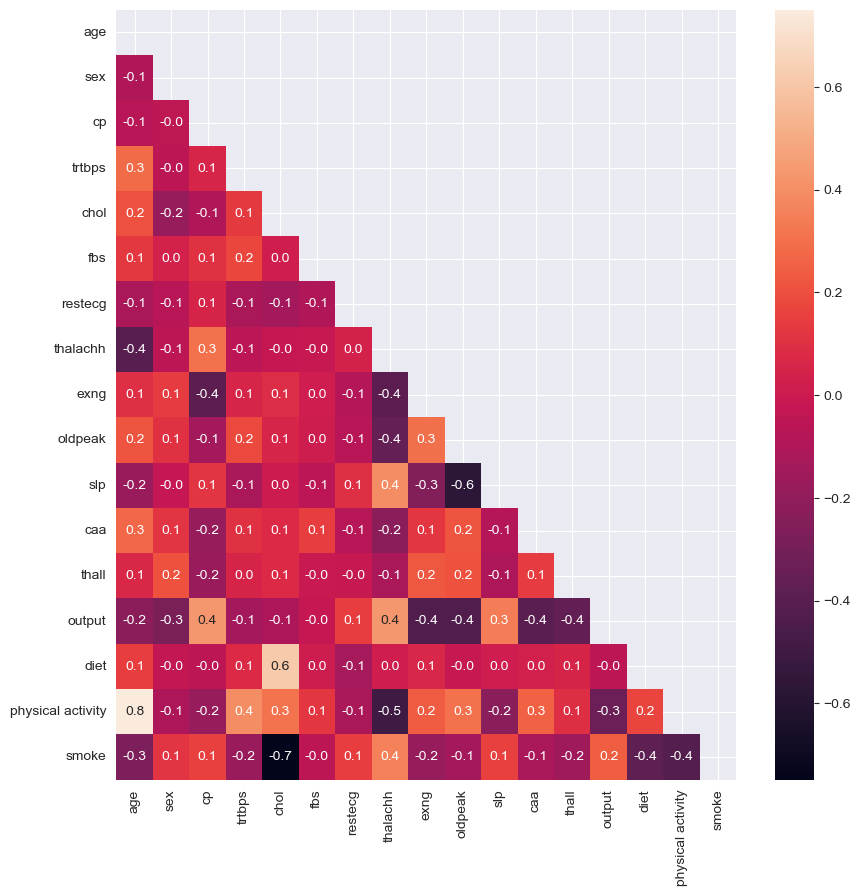

In [60]:
plt.figure(figsize=(10,10))
heart_data_corr = heart_data.corr().transpose()
mask = np.triu(np.ones_like(heart_data_corr))
sns.heatmap(heart_data_corr,mask=mask,fmt=".1f",annot=True)
plt.show()

Correlation shows whether the characteristics are related to each other or to the target
variable. Correlation can be positive (increase in one value, the value of the objective
variable increases) or negative (increase in one value, the value of the target variable
decreased)
From the Correlation matrix of heatmap, there is no strong correlation between the
attributes, indicating no multi-colinearity issues in the data

#### Feature selection

[0.07893704 0.03760801 0.13213899 0.06406382 0.06527896 0.00835694
 0.01724427 0.11577534 0.05577312 0.11411666 0.04461051 0.12181098
 0.10812376 0.00546768 0.0141     0.01659392]


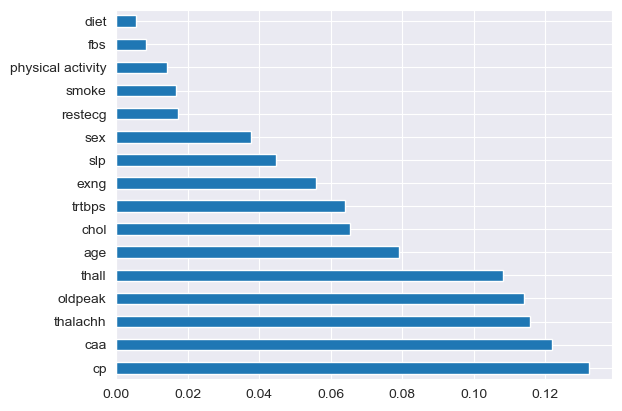

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
X = heart_data.drop('output',axis = 1)
y = heart_data['output']
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

We can gain the significance of each feature of our dataset by using the Model
Characteristics property. Feature value gives us a score for every function of our
results, the higher the score the more significant or appropriate the performance
variable is. Feature importance is the built-in class that comes with Tree Based
Classifiers to extract the top features for the dataset.
Features from cp (Chest Pain) to sex are chosen based on the Random Forest
Classifier’s feature importance since they collectively account for 90% of Feature
importance.

### 3. Model Building

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [86]:
X = heart_data.drop('output',axis=1)
y = heart_data[['output']]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#### Logistic Regression

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Train accuracy score ", accuracy_score(y_train,logreg.predict(X_train)))
print("Test accuracy score", accuracy_score(y_test, y_pred))

Train accuracy score  0.8541666666666666
Test accuracy score 0.8524590163934426


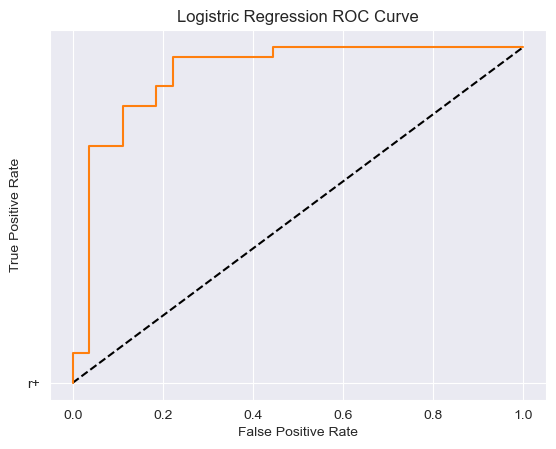

In [89]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

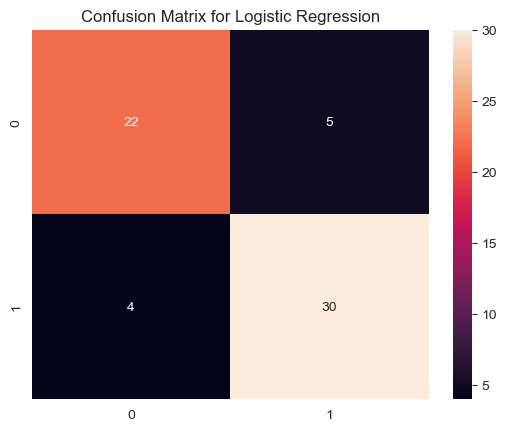

In [90]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Logistic Regression')

In [91]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = (TP / float(TP + FN))
print('sensitivity:', sensitivity)
specificity = (TN / float(TN + FP))
print('specificity:',specificity)
precision = (TP / float(TP + FP))
print('precision:',precision)
recall = (TP / float(TP + FN))
print('Recall:', recall)
print('f1 score:', 2 * ((precision * recall) / (precision + recall)))

sensitivity: 0.8823529411764706
specificity: 0.8148148148148148
precision: 0.8571428571428571
Recall: 0.8823529411764706
f1 score: 0.8695652173913043


#### Decision Tree

In [92]:
dt = DecisionTreeClassifier(min_samples_split=25,random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Train accuracy score", accuracy_score(y_train,dt.predict(X_train)))
print("Test accuracy score ", accuracy_score(y_test, y_pred))

Train accuracy score 0.875
Test accuracy score  0.8524590163934426


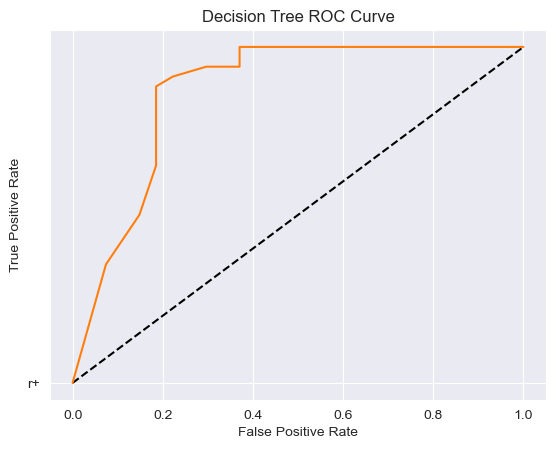

In [93]:
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

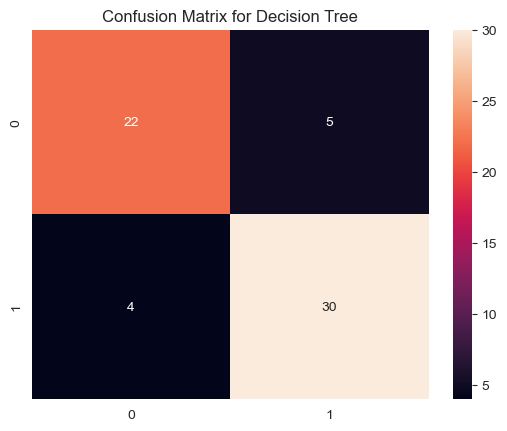

In [94]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Decision Tree')

In [95]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = (TP / float(TP + FN))
print('sensitivity:', sensitivity)
specificity = (TN / float(TN + FP))
print('specificity:',specificity)
precision = (TP / float(TP + FP))
print('precision:',precision)
recall = (TP / float(TP + FN))
print('Recall:', recall)
print('f1 score:', 2 * ((precision * recall) / (precision + recall)))

sensitivity: 0.8823529411764706
specificity: 0.8148148148148148
precision: 0.8571428571428571
Recall: 0.8823529411764706
f1 score: 0.8695652173913043


#### Random Forest

In [96]:
rf = RandomForestClassifier(n_estimators = 65,min_samples_split=25,random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Train accuracy score", accuracy_score(y_train,rf.predict(X_train)))
print("Test accuracy score", accuracy_score(y_test, y_pred))

Train accuracy score 0.9083333333333333
Test accuracy score 0.8852459016393442


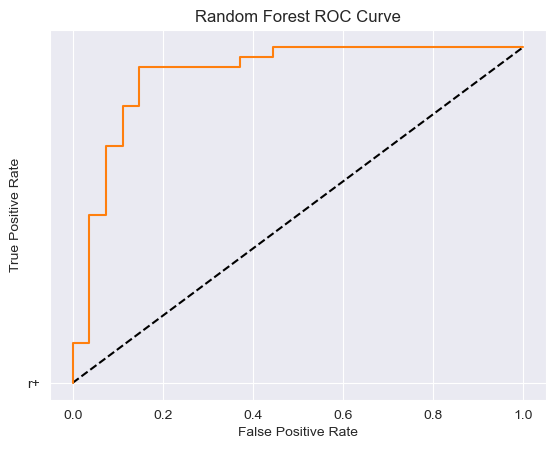

In [97]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

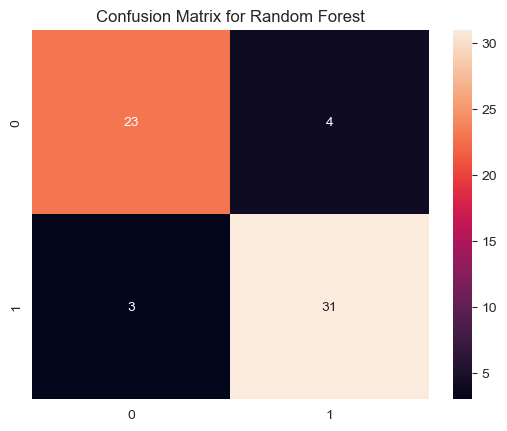

In [75]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Random Forest')

In [76]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = (TP / float(TP + FN))
print('sensitivity:', sensitivity)
specificity = (TN / float(TN + FP))
print('specificity:',specificity)
precision = (TP / float(TP + FP))
print('precision:',precision)
recall = (TP / float(TP + FN))
print('Recall:', recall)
print('f1 score:', 2 * ((precision * recall) / (precision + recall)))

sensitivity: 0.9117647058823529
specificity: 0.8518518518518519
precision: 0.8857142857142857
Recall: 0.9117647058823529
f1 score: 0.8985507246376812


#### Support vector Classifier

In [77]:
clf = SVC(kernel='linear', C=1,random_state=42,probability=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Train accuracy score", accuracy_score(y_train,clf.predict(X_train)))
print("Test accuracy score", accuracy_score(y_test, y_pred))

Train accuracy score 0.8583333333333333
Test accuracy score 0.8524590163934426


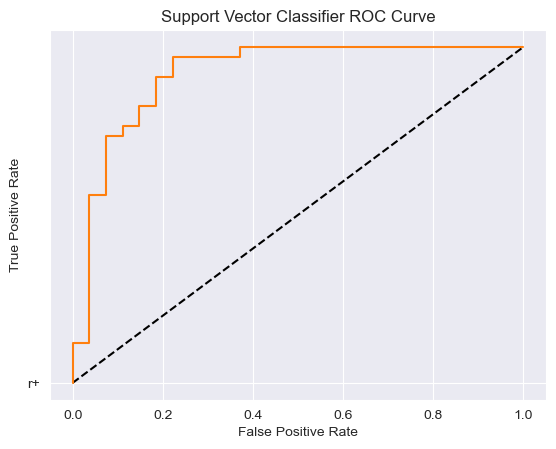

In [78]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Classifier ROC Curve")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Classifier')

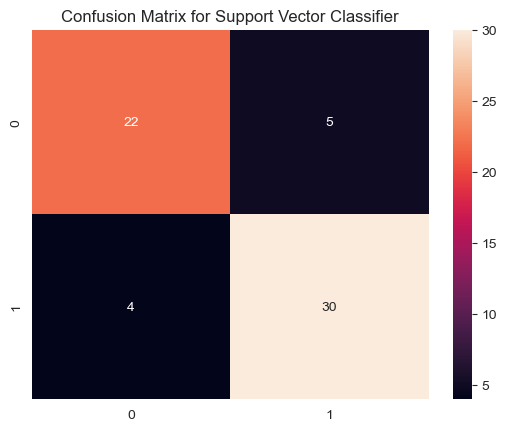

In [79]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Support Vector Classifier')

In [80]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = (TP / float(TP + FN))
print('sensitivity:', sensitivity)
specificity = (TN / float(TN + FP))
print('specificity:',specificity)
precision = (TP / float(TP + FP))
print('precision:',precision)
recall = (TP / float(TP + FN))
print('Recall:', recall)
print('f1 score:', 2 * ((precision * recall) / (precision + recall)))

sensitivity: 0.8823529411764706
specificity: 0.8148148148148148
precision: 0.8571428571428571
Recall: 0.8823529411764706
f1 score: 0.8695652173913043


#### Naive Bayes

In [81]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Train accuracy score", accuracy_score(y_train,nb.predict(X_train)))
print("Test accuracy score", accuracy_score(y_test, y_pred))

Train accuracy score 0.8375
Test accuracy score 0.819672131147541


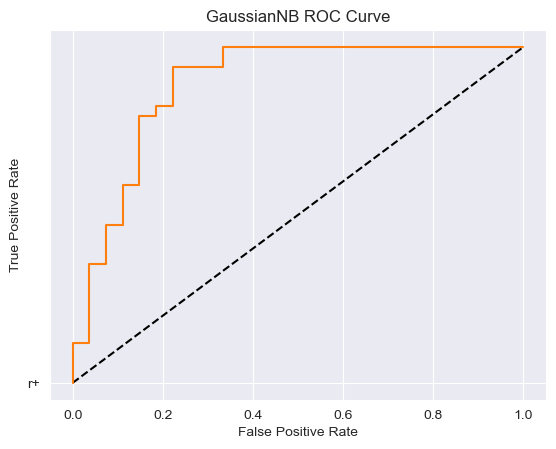

In [82]:
y_pred_proba = nb.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GaussianNB ROC Curve")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for GaussianNB')

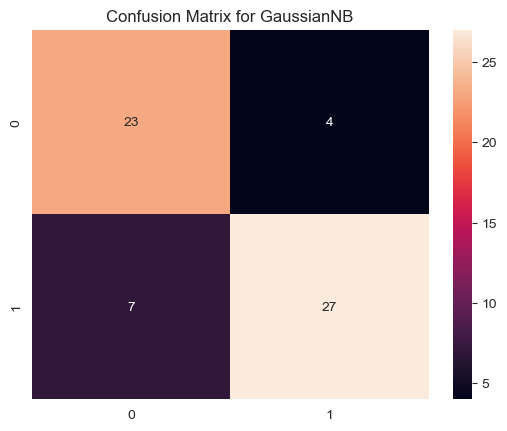

In [83]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for GaussianNB')

In [84]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
sensitivity = (TP / float(TP + FN))
print('sensitivity:', sensitivity)
specificity = (TN / float(TN + FP))
print('specificity:',specificity)
precision = (TP / float(TP + FP))
print('precision:',precision)
recall = (TP / float(TP + FN))
print('Recall:', recall)
print('f1 score:', 2 * ((precision * recall) / (precision + recall)))

sensitivity: 0.7941176470588235
specificity: 0.8518518518518519
precision: 0.8709677419354839
Recall: 0.7941176470588235
f1 score: 0.8307692307692308
